In [1]:
import h5py

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from rfest import splineLNLN
from rfest import get_stimulus_design_matrix

# Load data 

** This notebook use data from [(Maheswaranathan et. al. 2018)](https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1006291). You can download it [here](https://github.com/baccuslab/inferring-hidden-structure-retinal-circuits/blob/master/rgc_whitenoise.h5).

In [2]:
datapath = '../../data_nirum/rgc_whitenoise.h5' # change this to where you save the file
with h5py.File(datapath, 'r') as f:
    stimulus = np.array(f['stimulus'])
    rates = np.array(f['firing_rates'])

In [3]:
stim_dim = stimulus.shape[0]
hist_dim = 40
dims = [hist_dim, stim_dim]
cell_id = 7


X = get_stimulus_design_matrix(stimulus.T, hist_dim)
y = rates[cell_id]
dt = 1

## Single filter LNP with splines

if `num_subunits` is set to 1, then LNLN is actually just a single filter LNP model.

In [4]:
lnp = splineLNLN(X[:30000], y[:30000], dt, dims, df_splines=[21, 14])
lnp.fit(num_subunits=1, num_iters=8000, alpha=1, lambd=1.25, gamma=0, verbal=100)

/usr/local/lib/python3.6/dist-packages/jax/lib/xla_bridge.py:115: UserWarning: No GPU/TPU found, falling back to CPU.
  warnings.warn('No GPU/TPU found, falling back to CPU.')


Iter	Cost	
0	-9819.507	
100	-210666.475	
200	-220213.251	
300	-222123.655	
400	-222329.292	
500	-222354.201	
600	-222356.805	
700	-222357.359	
800	-222357.460	
900	-222357.540	
1000	-222360.908	
1100	-222427.978	
1200	-222428.255	
Stop at 1253 steps: cost has been changing less than 1e-5 for 10 steps.


Text(0.5, 1.0, 'LNP filter')

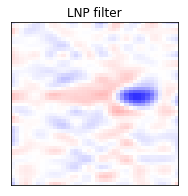

In [5]:
k = lnp.w_opt
k_norm = ( k/ np.linalg.norm(k)).reshape(dims)

fig, ax = plt.subplots(figsize=(3,3))
ax.imshow(k_norm.T, origin='lower', cmap=plt.cm.bwr, vmin=-0.2, vmax=0.2, aspect="auto")
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('LNP filter')

## Multifilter LNP with splines

Spline-based LNLN can retrieve multiple smooth RFs from relatively small amount of data (in this example, 5 mins). 

In [6]:
lnln = splineLNLN(X[:30000], y[:30000], dt, dims, df_splines=[21, 14])
lnln.fit(num_subunits=4, num_iters=8000, alpha=1, lambd=1.25, gamma=0, verbal=100)

Iter	Cost	
0	-138755.980	
100	-249251.548	
200	-252037.553	
300	-252246.657	
400	-252249.231	
500	-252249.244	
Stop at 546 steps: cost has been changing less than 1e-5 for 10 steps.


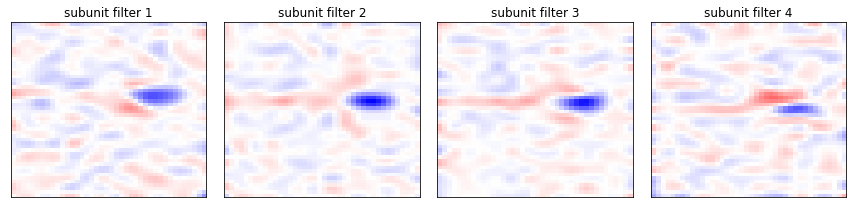

In [7]:
num_subs = 4
fig, ax = plt.subplots(1, num_subs, gridspec_kw={'width_ratios': [3, 3, 3, 3],
                                                  'height_ratios': [1]}, 
                       figsize=(12,3), sharey=True)

order = [3,2,1,0]
w_opt = lnln.w_opt[:, order]
for i in range(num_subs):
    k = w_opt[:, i]
#     ax[-1].axis('off')
    k_norm = ( k/ np.linalg.norm(k)).reshape(dims)
    im = ax[i].imshow(k_norm.T, origin='lower', cmap=plt.cm.bwr, vmin=-0.2, vmax=0.2, aspect="auto")
#     ax[i].axis('off')
    ax[i].set_title('subunit filter {}'.format(i+1))
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    
plt.tight_layout()